In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pandas as pd
import os
import math
from PIL import Image
import cv2

import zipfile
import random
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [71]:
# Unzipping the data

with zipfile.ZipFile('archive (5).zip', 'r') as zip_ref:
    zip_ref.extractall()

In [72]:
def preprocesing_image(image):
    # Gray scaling
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Normalizing
    normalized_image = gray_image / 255.0
    # Adding extra axis to make it compatible to deep learning models like CNN
    normalized_img = np.expand_dims(normalized_image, axis=-1)
    return normalized_img

In [73]:
data_folder = 'brain_tumor_dataset'

# Ensure the path is valid
if os.path.exists(data_folder):
    inner_folders = ['yes', 'no']
    image_data = []

    # Loop through each inner folder
    for folder in inner_folders:
        # Get the inner folder path
        folder_path = os.path.join(data_folder, folder)

        # Get the list of files in the folder
        files = os.listdir(folder_path)

        # Create touples with image and it's label
        #labeled_images = [(os.path.join(file,), folder) for file in files]
        labeled_images = []
        for image_path in files:
            image_inner_path = os.path.join(folder, image_path)
            full_image_path = os.path.join(data_folder, image_inner_path)
            image = cv2.imread(full_image_path)
            converted_image = preprocesing_image(image)
            labeled_images.append((converted_image, folder))

         # Adding the labeled images to the main list 
        image_data.extend(labeled_images)

        print(f"Folder '{folder}' contains {len(labeled_images)} images")

Folder 'yes' contains 155 images
Folder 'no' contains 98 images


### Data Augmentation

In [89]:
augmentation_factor = 2

# Aumentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

# Paths to 'no' (mniority class)
#negative_path = os.path.join(data_folder, 'no') 
#negative_files = os.listdir(negative_path)

augmented_dir = os.path.join(folder_path, 'augmented')
os.makedirs(augmented_dir, exist_ok=True)

# augment the 'no' set with 2 pictures of each picture in the set
for file in image_data:
    image, label = file[0], file[1]
    if label == 'no':
        img_array = np.array(image)
        img_array = img_array.reshape((1,) + img_array.shape)

        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=augmented_dir,
                                  save_prefix='aug', save_format='png'):
            i += 1
            if i >= augmentation_factor:
                break


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no


In [81]:
yes = len([label for label in y_train if label == 'yes'])
no = len([label for label in y_train if label == 'no'])

print(yes, no)

110 67


In [90]:
os.listdir(augmented_dir)

['aug_0_1023.png',
 'aug_0_1044.png',
 'aug_0_117.png',
 'aug_0_1174.png',
 'aug_0_1180.png',
 'aug_0_1188.png',
 'aug_0_1194.png',
 'aug_0_1226.png',
 'aug_0_1236.png',
 'aug_0_124.png',
 'aug_0_1342.png',
 'aug_0_1394.png',
 'aug_0_1406.png',
 'aug_0_142.png',
 'aug_0_1512.png',
 'aug_0_1614.png',
 'aug_0_1622.png',
 'aug_0_1638.png',
 'aug_0_1662.png',
 'aug_0_1663.png',
 'aug_0_1709.png',
 'aug_0_1716.png',
 'aug_0_177.png',
 'aug_0_1825.png',
 'aug_0_1963.png',
 'aug_0_2015.png',
 'aug_0_2031.png',
 'aug_0_2100.png',
 'aug_0_2119.png',
 'aug_0_2120.png',
 'aug_0_2129.png',
 'aug_0_2155.png',
 'aug_0_2223.png',
 'aug_0_23.png',
 'aug_0_2345.png',
 'aug_0_236.png',
 'aug_0_2368.png',
 'aug_0_2567.png',
 'aug_0_258.png',
 'aug_0_2666.png',
 'aug_0_2685.png',
 'aug_0_2698.png',
 'aug_0_2704.png',
 'aug_0_2792.png',
 'aug_0_2875.png',
 'aug_0_2894.png',
 'aug_0_3089.png',
 'aug_0_315.png',
 'aug_0_3150.png',
 'aug_0_3159.png',
 'aug_0_3281.png',
 'aug_0_331.png',
 'aug_0_3391.png',
 'a

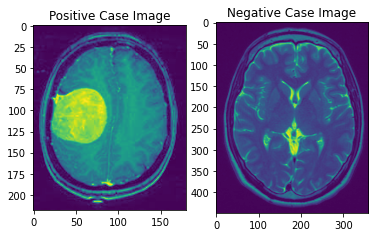

In [43]:
positive_image = image_data[0][0]
negative_image = image_data[-1][0]

fix, axs = plt.subplots(1,2)
axs[0].imshow(positive_image)
axs[0].set_title('Positive Case Image')

axs[1].imshow(negative_image)
axs[1].set_title('Negative Case Image')

plt.show()

In [36]:
image_data_shuffled = random.shuffle(image_data)
image_data

[(array([[31, 33, 32, ..., 41, 28, 30],
         [31, 33, 32, ..., 36, 22, 29],
         [31, 32, 32, ..., 28, 29, 36],
         ...,
         [27, 27, 27, ..., 31, 35, 30],
         [27, 27, 27, ..., 31, 35, 30],
         [27, 27, 27, ..., 31, 35, 30]], dtype=uint8),
  'yes'),
 (array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  'yes'),
 (array([[252, 254, 255, ..., 255, 254, 251],
         [ 37,  29,  32, ...,  33,  31,  39],
         [ 25,   2,   1, ...,   0,   2,  24],
         ...,
         [ 25,   2,   0, ...,   0,   2,  25],
         [ 37,  29,  29, ...,  29,  29,  37],
         [254, 254, 254, ..., 254, 254, 254]], dtype=uint8),
  'no'),
 (array([[255, 255, 255, ..., 252, 247, 250],
         [255, 255, 255, ..., 249, 250, 248],
         [255, 253, 234, ..., 233, 252, 252],
         ...,
         [25

In [44]:
train_size = 0.7
validation_size = 0.15
test_size = 0.15

train_set, test_set = train_test_split(image_data, test_size=1 - train_size, random_state=42)
validation_set, test_set = train_test_split(test_set, test_size=test_size/(test_size + validation_size), random_state=42)

print("Train set size:", len(train_set))
print("Validation set size:", len(validation_set))
print("Test set size:", len(test_set))

Train set size: 177
Validation set size: 38
Test set size: 38


In [45]:
def count_picture_in_set(data_set: list, data_set_name: str):
    """
    counting the number of the pictures of each class in the data set
    """
    yes_pictures = [picture for picture in data_set if picture[1] == 'yes']
    no_pictures = [picture for picture in data_set if picture[1] == 'no']

    print(f"Number of positive cases in {data_set_name} is: {len(yes_pictures)}")
    print(f"Number of negative cases in {data_set_name} is: {len(no_pictures)}")

In [46]:
count_picture_in_set(train_set, 'train_set')
print("\n")
count_picture_in_set(validation_set, 'validation_set')
print("\n")
count_picture_in_set(test_set, 'test_set')

Number of positive cases in train_set is: 110
Number of negative cases in train_set is: 67


Number of positive cases in validation_set is: 26
Number of negative cases in validation_set is: 12


Number of positive cases in test_set is: 19
Number of negative cases in test_set is: 19


In [47]:
X_train = [picture[0] for picture in train_set]
y_train = [picture[1] for picture in train_set]

X_val = [picture[0] for picture in validation_set]
y_val = [picture[1] for picture in validation_set]

X_test = [picture[0] for picture in test_set]
y_test = [picture[1] for picture in test_set]

### Data Augmentation

In [57]:
augmentation_factor = 2

# Aumentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

# Paths to 'no' (mniority class)
negative_path = os.path.join(data_folder, 'no') 
negative_files = os.listdir(negative_path)

# augment the 'no' set with 2 pictures of each picture in the set
for image, label in enumerate(image_data):
    if label == 'no':
        img_array = np.array(image)
        img_array = img_array.reshape(img_array.shape)

        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=negative_path,
                                  save_prefix='aug', save_format='png'):
            i += 1
            if i >= augmentation_factor:
                break


110 67


In [65]:
len(os.listdir(negative_path))

98